## ANÁLISE ESTATÍSTICA DOS DADOS - MINERAÇÃO DE DADOS 2017.1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/transformed.csv', index_col=0)

In [3]:
df.head()

,VREF,ALVO_FINAL,ALTO CAPIBARIBE,ARARIPINA,BREJO PERNAMBUCANO,FERNANDO DE NORONHA,GARANHUNS,ITAMARAC�,ITAPARICA,MATA MERIDIONAL PERNAMBUCANA,...,0,1,A,B,C,D,E,F,N,Z
0,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [4]:
len(df.columns)

77

## DEALING WITH UNBALANCED DATA

In [5]:
df['ALVO_FINAL'].unique()

array([0, 1])

In [6]:
len(df[df['ALVO_FINAL'] == 0])

599854

In [7]:
len(df[df['ALVO_FINAL'] == 1])

46992

In [8]:
n_ones = len(df[df['ALVO_FINAL'] == 1])
df_ones = df[df['ALVO_FINAL'] == 1]

In [9]:
# CHOOSE n_ones RANDOM FROM TARGET == 0
instances = np.random.permutation(n_ones)

In [10]:
df_zeros = df[df['ALVO_FINAL'] == 0].iloc[instances, :]

In [11]:
df_balanced = pd.concat(objs=[df_ones, df_zeros], axis=0)
df_balanced = df_balanced.reset_index()
df_balanced.drop(labels='index', axis=1, inplace=True)

In [12]:
df_balanced.head()

,VREF,ALVO_FINAL,ALTO CAPIBARIBE,ARARIPINA,BREJO PERNAMBUCANO,FERNANDO DE NORONHA,GARANHUNS,ITAMARAC�,ITAPARICA,MATA MERIDIONAL PERNAMBUCANA,...,0,1,A,B,C,D,E,F,N,Z
0,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,5000.0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1.0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1.0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
len(df_balanced[df_balanced['ALVO_FINAL'] == 0])

46992

In [14]:
len(df_balanced[df_balanced['ALVO_FINAL'] == 1])

46992

## MEASURING FEATURE IMPORTANCE WITH RANDO FOREST

In [15]:
X = df_balanced.drop(labels=['ALVO_FINAL'], axis=1).values
y = df_balanced['ALVO_FINAL'].values

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=100)
forest.fit(X, y)
importances = forest.feature_importances_

building tree 2 of 1000building tree 1 of 1000 building tree 3 of 1000

 
building tree 5 of 1000building tree 6 of 1000building tree 4 of 1000  building tree 8 of 1000


building tree 7 of 1000

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
building tree 9 of 1000
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
building tree 10 of 1000
building tree 11 of 1000[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s

[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
building tree 12 of 1000[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s

building tree 13 of 1000
building tree 14 of 1000[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
building tree 15 of 1000building tree 16 of 1000[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
building tree 17 of 1000
[Parallel(n_jobs=-1)]:

In [17]:
features = list(df.columns)
features.remove('ALVO_FINAL')

In [52]:
indices = np.argsort(importances)[::-1]
sorted_features = []
for f in range(X.shape[1] - 1):
    sorted_features.append(features[indices[f]])
    sorted_importances.append(importances[indices[f]])
    print("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importances[indices[f]]))
    
sorted_features = np.array(sorted_features)

 1) VREF                           0.705306
 2) 23                             0.069499
 3) 28                             0.064800
 4) N                              0.021458
 5) 1                              0.017519
 6) 0                              0.016269
 7) 12.0                           0.012328
 8) 11.0                           0.009937
 9) Z                              0.008777
10) 17.0                           0.005560
11) 10.0                           0.004279
12) 9.0                            0.004269
13) 13.0                           0.003803
14) 1.0                            0.002726
15) B                              0.002409
16) F                              0.002405
17) D                              0.002366
18) RECIFE                         0.002238
19) REGIAO METROPOLITANA DO RECIFE 0.002154
20) 8.0                            0.002059
21) 18.0                           0.001961
22) 7.0                            0.001961
23) 15.0                        

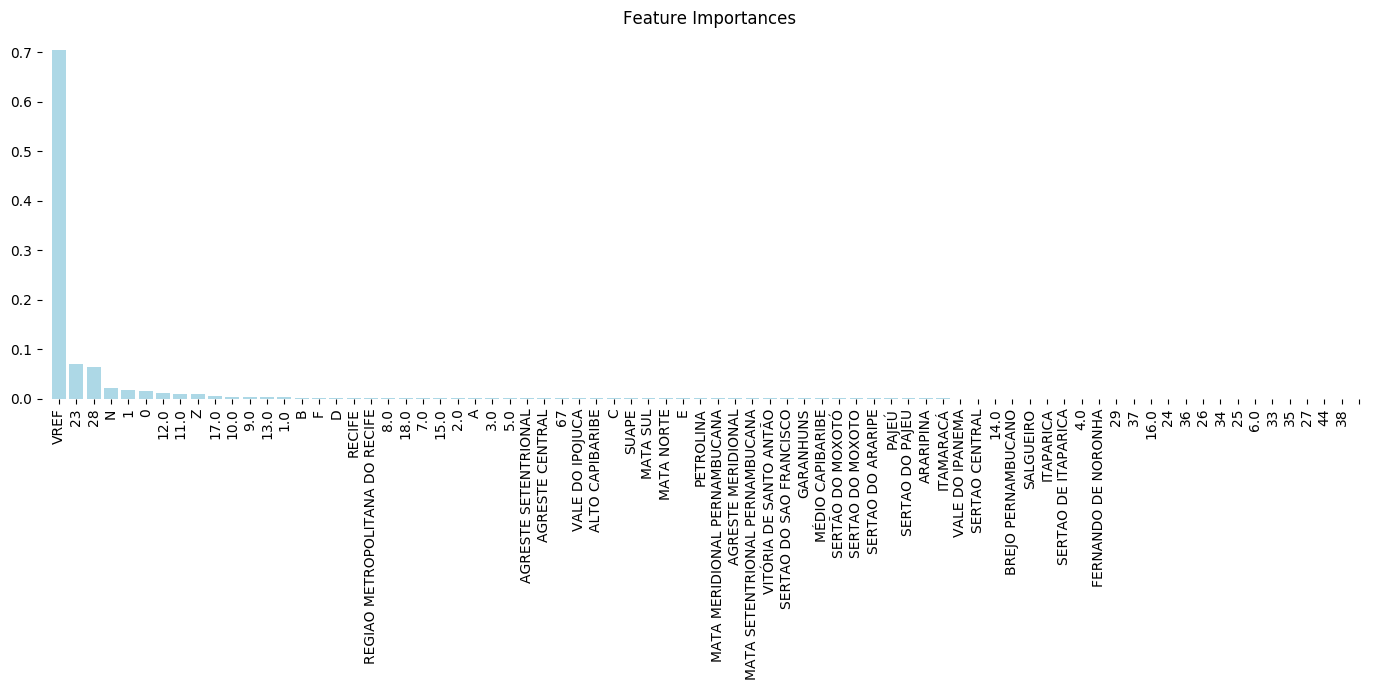

In [56]:
sns.reset_orig()
plt.figure(figsize=(14,7))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X.shape[1]), [string.decode("latin-1") for string in sorted_features], rotation=90)
plt.xlim([-1, X.shape[1]])
sns.despine(bottom=True, left=True)
plt.tight_layout()

In [59]:
sorted_features

array(['VREF', '23', '28', 'N', '1', '0', '12.0', '11.0', 'Z', '17.0',
       '10.0', '9.0', '13.0', '1.0', 'B', 'F', 'D', 'RECIFE',
       'REGIAO METROPOLITANA DO RECIFE', '8.0', '18.0', '7.0', '15.0',
       '2.0', 'A', '3.0', '5.0', 'AGRESTE SETENTRIONAL', 'AGRESTE CENTRAL',
       '67', 'VALE DO IPOJUCA', 'ALTO CAPIBARIBE', 'C', 'SUAPE',
       'MATA SUL', 'MATA NORTE', 'E', 'PETROLINA',
       'MATA MERIDIONAL PERNAMBUCANA', 'AGRESTE MERIDIONAL',
       'MATA SETENTRIONAL PERNAMBUCANA', 'VIT\xd3RIA DE SANTO ANT\xc3O',
       'SERTAO DO SAO FRANCISCO', 'GARANHUNS', 'M\xc9DIO CAPIBARIBE',
       'SERT\xc3O DO MOXOT\xd3', 'SERTAO DO MOXOTO', 'SERTAO DO ARARIPE',
       'PAJE\xda', 'SERTAO DO PAJEU', 'ARARIPINA', 'ITAMARAC\xc1',
       'VALE DO IPANEMA', 'SERTAO CENTRAL', '14.0', 'BREJO PERNAMBUCANO',
       'SALGUEIRO', 'ITAPARICA', 'SERTAO DE ITAPARICA', '4.0',
       'FERNANDO DE NORONHA', '29', '37', '16.0', '24', '36', '26', '34',
       '25', '6.0', '33', '35', '27', '44', '38'

In [72]:
indexes = np.arange(0, 10, 1)
Att = []
for idx in indexes:
    Att.append(sorted_features[idx])
    print sorted_features[idx], importances[indices[idx]]

VREF 0.705306028404
23 0.0694993941523
28 0.0647996003494
N 0.0214579248309
1 0.0175185019158
0 0.016269004411
12.0 0.0123280259435
11.0 0.00993717686761
Z 0.00877682357959
17.0 0.00555972035553


In [73]:
Att

['VREF', '23', '28', 'N', '1', '0', '12.0', '11.0', 'Z', '17.0']

In [74]:
df_balanced[Att].head()

,VREF,23,28,N,1,0,12.0,11.0,Z,17.0
0,1.0,0,1,1,1,0,0,0,0,0
1,5000.0,0,1,1,0,1,0,0,0,0
2,1.0,0,1,1,1,0,0,0,0,0
3,1.0,0,1,1,1,0,0,0,0,0
4,1.0,0,1,1,1,0,0,0,0,0


In [75]:
df_balanced[Att].to_csv('balanced.csv', index=False)

In [76]:
pd.read_csv('balanced.csv').head()

,VREF,23,28,N,1,0,12.0,11.0,Z,17.0
0,1.0,0,1,1,1,0,0,0,0,0
1,5000.0,0,1,1,0,1,0,0,0,0
2,1.0,0,1,1,1,0,0,0,0,0
3,1.0,0,1,1,1,0,0,0,0,0
4,1.0,0,1,1,1,0,0,0,0,0


In [77]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
X = df_balanced[Att].values
y = df_balanced['ALVO_FINAL'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## NEURAL NET REVISITED

SCORE: 0.897467725919
             precision    recall  f1-score   support

          0       0.92      0.87      0.90     14205
          1       0.88      0.92      0.90     13991

avg / total       0.90      0.90      0.90     28196



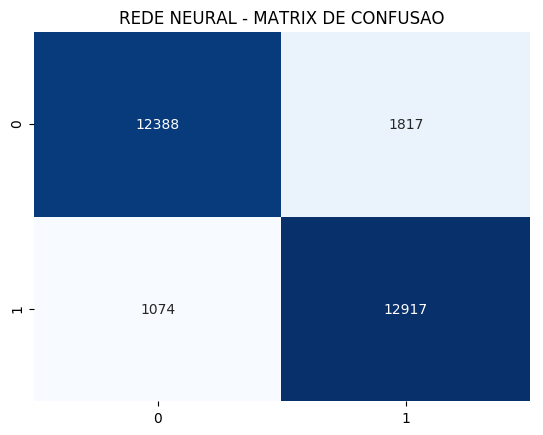

In [81]:
dim = X.shape[1]
clf = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(dim, dim/2, 2*dim),
                    max_iter=500)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('REDE NEURAL - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## RANDOM FORESTS REVISITED

SCORE: 0.907752872748
             precision    recall  f1-score   support

          0       0.93      0.88      0.91     14205
          1       0.88      0.94      0.91     13991

avg / total       0.91      0.91      0.91     28196



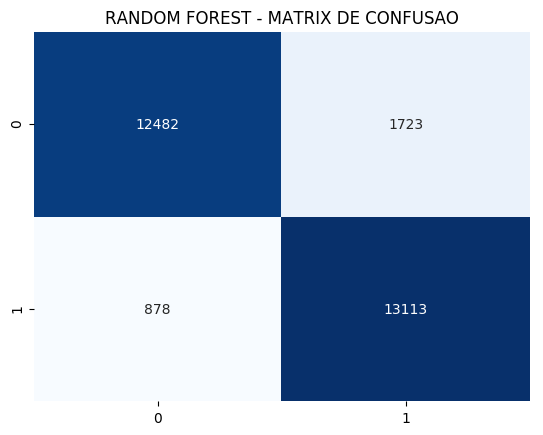

In [82]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('RANDOM FOREST - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## SUPPORT VECTOR MACHINES

SCORE: 0.734820541921
             precision    recall  f1-score   support

          0       0.79      0.65      0.71     14205
          1       0.70      0.82      0.75     13991

avg / total       0.74      0.73      0.73     28196



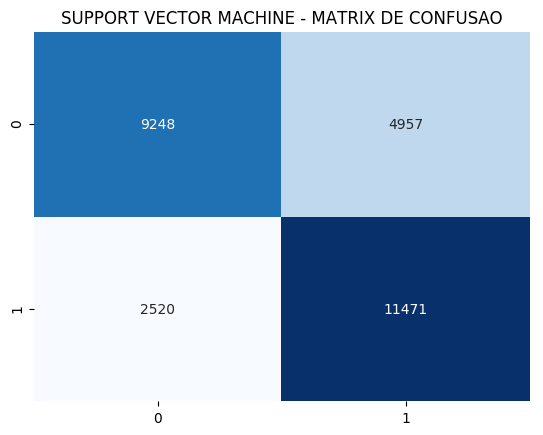

In [83]:
clf = SVC(kernel='rbf', C=10, gamma=0.001)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('SUPPORT VECTOR MACHINE - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## CLUSTERING DATA WITH MEAN SHIFT

In [124]:
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

In [104]:
df_balanced[Att][df_balanced['ALVO_FINAL'] == 1].head()

,VREF,23,28,N,1,0,12.0,11.0,Z,17.0
0,1.0,0,1,1,1,0,0,0,0,0
1,5000.0,0,1,1,0,1,0,0,0,0
2,1.0,0,1,1,1,0,0,0,0,0
3,1.0,0,1,1,1,0,0,0,0,0
4,1.0,0,1,1,1,0,0,0,0,0


In [105]:
to_cluster = df_balanced[Att][df_balanced['ALVO_FINAL'] == 1]

In [106]:
to_cluster.head()

,VREF,23,28,N,1,0,12.0,11.0,Z,17.0
0,1.0,0,1,1,1,0,0,0,0,0
1,5000.0,0,1,1,0,1,0,0,0,0
2,1.0,0,1,1,1,0,0,0,0,0
3,1.0,0,1,1,1,0,0,0,0,0
4,1.0,0,1,1,1,0,0,0,0,0


In [107]:
data = to_cluster.values[:1000, :]

In [108]:
data

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.00000000e+03,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [109]:
clf = MiniBatchKMeans(n_clusters=2)

In [110]:
clf.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [111]:
clf.cluster_centers_

array([[  1.77197237e+05,   1.83411714e-01,   8.14450620e-01,
          8.37109876e-01,   7.31509192e-01,   2.68490808e-01,
          1.43651133e-01,   4.06156477e-02,   1.29115006e-01,
          2.44121419e-01],
       [  1.05012196e+06,   3.47957640e-01,   6.52042360e-01,
          8.41149773e-01,   6.97428139e-01,   3.02571861e-01,
          1.18003026e-01,   1.36157337e-02,   9.68229955e-02,
          3.19213313e-01]])

In [112]:
 def intra_cluster_statistic(data, centroids):
        clusters = {}
        for k in centroids:
            clusters[k] = []

        for xi in data:
            dist = [np.linalg.norm(xi - centroids[c]) for c in centroids]
            class_ = dist.index(min(dist))
            clusters[class_].append(xi)

        inter_cluster_sum = 0.0
        non_empty_clusters = 0
        for c in centroids:
            intra_sum = 0.0
            if len(clusters[c]) > 0:
                for point in clusters[c]:
                    intra_sum += np.linalg.norm(point - centroids[c])
                intra_sum = intra_sum / len(clusters[c])
                non_empty_clusters += 1
            inter_cluster_sum += intra_sum
        inter_cluster_sum = inter_cluster_sum / non_empty_clusters
        return inter_cluster_sum

In [113]:
len(clf.cluster_centers_)

2

In [114]:
def to_dict_centroids(centers):
    centroids = {}
    for i in range(len(centers)):
        centroids[i] = centers[i]
    return centroids

In [115]:
centroids = to_dict_centroids(clf.cluster_centers_)

In [116]:
intra_cluster_statistic(data, centroids)

167504.38993424876

In [117]:
avg = []
std = []
for n_clusters in range(2, 10):
    intra_statistic = []
    for i in range(30):
        clf = MiniBatchKMeans(n_clusters=n_clusters)
        clf.fit(data)
        centroids = to_dict_centroids(clf.cluster_centers_)
        intra_statistic.append(intra_cluster_statistic(data, centroids))
    avg.append(np.mean(intra_statistic))
    std.append(np.std(intra_statistic))

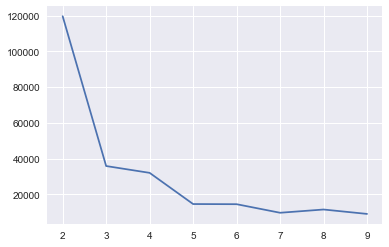

In [40]:
plt.plot(range(2, 10), intra_statistic)

## K-MEANS

In [ ]:
avg = []
std = []
for n_clusters in range(2, 10):
    intra_statistic = []
    for i in range(30):
        clf = MiniBatchKMeans(n_clusters=n_clusters)
        clf.fit(data)
        centroids = to_dict_centroids(clf.cluster_centers_)
        intra_statistic.append(intra_cluster_statistic(data, centroids))
    avg.append(np.mean(intra_statistic))
    std.append(np.std(intra_statistic))

<Container object of 3 artists>

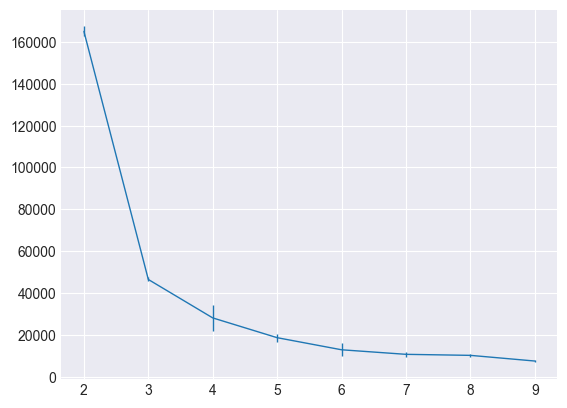

In [119]:
sns.set_style('darkgrid')
plt.errorbar(x=range(2, 10), y=avg, yerr=std, lw=1)

## FUZZ-C Means

In [126]:
import numpy as np

class FCMeans(object):
    def __init__(self, n_clusters=3, n_iter=300, fuzzy_c=2, tolerance=0.001):
        self.n_clusters = n_clusters
        self.n_iter = n_iter
        self.fuzzy_c = fuzzy_c
        self.tolerance = tolerance
        self.run = False

    def fit(self, x):
        self.run = True
        self.centroids = {}

        if len(x.shape) < 1:
            raise Exception("DataException: Dataset must contain more examples" +
                            "than the required number of clusters!")

        for k in range(self.n_clusters):
            self.centroids[k] = np.random.random(x.shape[1])

        self.degree_of_membership = np.zeros((x.shape[0], self.n_clusters))
        for idx_ in self.centroids:
            for idx, xi in enumerate(x):
                updated_degree_of_membership = 0.0
                norm = np.linalg.norm(xi - self.centroids[idx_])
                all_norms = [norm / np.linalg.norm(xi - self.centroids[c]) for c in self.centroids]
                all_norms = np.power(all_norms, 2 / (self.fuzzy_c - 1))
                updated_degree_of_membership = 1 / sum(all_norms)
                self.degree_of_membership[idx][idx_] = updated_degree_of_membership

        for iteration in range(self.n_iter):
            powers = np.power(self.degree_of_membership, self.fuzzy_c)
            for idx_ in self.centroids:
                centroid = []
                sum_membeship = 0
                for idx, xi in enumerate(x):
                    centroid.append(powers[idx][idx_] * np.array(xi))
                    sum_membeship += powers[idx][idx_]
                centroid = np.sum(centroid, axis=0)
                centroid = centroid / sum_membeship
                self.centroids[idx_] = centroid

            max_episilon = 0.0
            for idx_ in self.centroids:
                for idx, xi in enumerate(x):
                    updated_degree_of_membership = 0.0
                    norm = np.linalg.norm(xi - self.centroids[idx_])
                    all_norms = [norm / np.linalg.norm(xi - self.centroids[c]) for c in self.centroids]
                    all_norms = np.power(all_norms, 2 / (self.fuzzy_c - 1))
                    updated_degree_of_membership = 1 / sum(all_norms)
                    diff = updated_degree_of_membership - self.degree_of_membership[idx][idx_]
                    self.degree_of_membership[idx][idx_] = updated_degree_of_membership

                    if diff > max_episilon:
                        max_episilon = diff
            if max_episilon <= self.tolerance:
                break

    def predict(self, x):
        if self.run:
            if len(x.shape) > 1:
                class_ = []
                for c in self.centroids:
                    class_.append(np.sum((x - self.centroids[c]) ** 2, axis=1))
                return np.argmin(np.array(class_).T, axis=1)
            else:
                dist = [np.linalg.norm(x - self.centroids[c]) for c in self.centroids]
                class_ = dist.index(min(dist))
                return class_
        else:
            raise Exception("NonTrainedModelException: You must fit data first!")


In [128]:
avg = []
std = []
for n_clusters in range(2, 10):
    intra_statistic = []
    for i in range(30):
        clf = FCMeans(n_clusters=n_clusters)
        clf.fit(data)
        centroids = to_dict_centroids(clf.centroids)
        intra_statistic.append(intra_cluster_statistic(data, centroids))
    avg.append(np.mean(intra_statistic))
    std.append(np.std(intra_statistic))

<Container object of 3 artists>

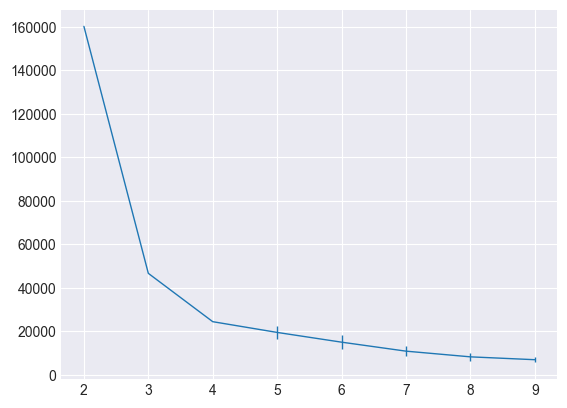

In [129]:
sns.set_style('darkgrid')
plt.errorbar(x=range(2, 10), y=avg, yerr=std, lw=1)

## Majority Vote Classifier - Ensemble Method

In [84]:
import numpy as np
import operator

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
from sklearn.externals import six
from sklearn.pipeline import _name_estimators
from sklearn.preprocessing import LabelEncoder

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, classifiers, votes='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key:value for key, value in _name_estimators(classifiers)}
        self.votes = votes
        self.weights = weights
        
    def fit(self, X, y):
        if self.votes not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'; got (vote=%r)" % self.vote)
        
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal ; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))
            
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        if self.votes == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            preds = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x : np.argmax(np.bincount(x, weights=self.weights)),
                                           axis=1, arr=preds)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

SCORE: 0.901298056462
             precision    recall  f1-score   support

          0       0.92      0.88      0.90     14205
          1       0.88      0.93      0.90     13991

avg / total       0.90      0.90      0.90     28196



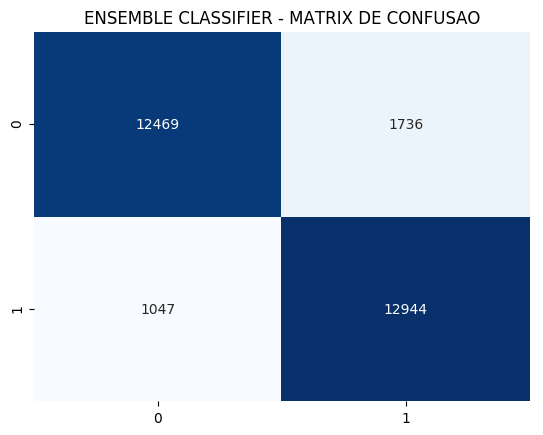

In [88]:
clf = MajorityVoteClassifier(classifiers=[clf1, clf2, clf3])
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('ENSEMBLE CLASSIFIER - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## Combinando as diferentes tecnicas para Ensemble Classification

In [85]:
clf1 = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(dim, dim/2, 2*dim),
                    max_iter=500)
clf2 = SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
clf3 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clfM = MajorityVoteClassifier(classifiers=[clf1, clf2, clf3])
clf_labels = ['MLP', 'SVM', 'Random Forests', 'Majority Voting']
clfs = [clf1, clf2, clf3, clfM]

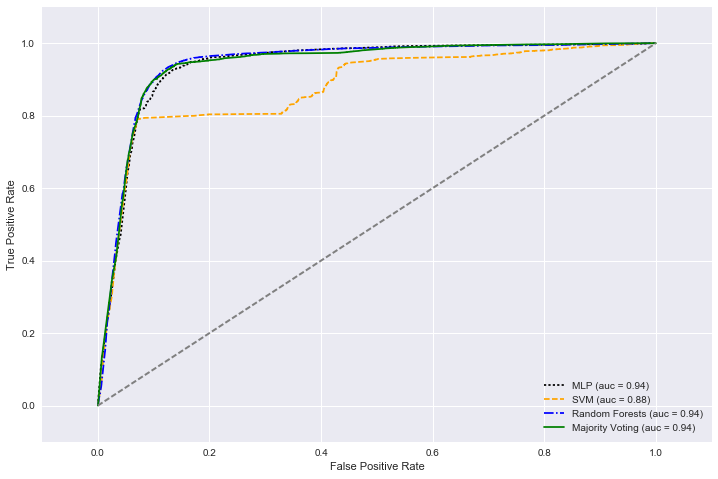

In [42]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

plt.figure(figsize=(12,8))
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
    preds = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=preds)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')